<h1> Исследование популярных направлений авиаперелётов </h1>

### Введение

Цель работы - выявить факторы, которые влияют на выбор направлений авиапелетов пользователями. Для этого мы возьмем данные об авиаперелетах в России за 2018 год и сопоставим их с данными о крупнейших фестивалях, проходящих в разных городах. 

В наших руках данные об авиаперелетах в России за 2018 год, которые разбиты между несколькими  таблицами: airports, aircrafts, tickets, flights, ticket_flights. Данные о фестивалях мы возьмем с сайта https://######index.html. Для этого напишем парсер для сбора данных. 

Далее с помощью СУБД проведем исследовательский анализ данных, объединим таблицы и посчитаем: количество рейсов на каждую модель самолета, количество рейсов на модели самолетов - Boing, Airbus и другие, среднее количество прибывающих рейсов по каждому из городов. Визуализируем эти данные с помощью Python. Сравним, как менялся спрос на билеты в города, когда в них проходили фестивали. 




In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
models = pd.read_csv('https://####.csv')

In [3]:
cities = pd.read_csv('https://####.csv')

### Проверка данных

In [4]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [5]:
models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
models.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


Ошибок и пропусков в данных нет. 

In [7]:
cities.average_flights = cities.average_flights.astype(np.float16)

### Топ 10 городов по количеству рейсов 

In [8]:
cities.sort_values('average_flights',ascending=False).head(10)

,city,average_flights
43,Москва,129.750000
70,Санкт-Петербург,31.156250
54,Новосибирск,17.328125
33,Красноярск,11.578125
20,Екатеринбург,11.320312
67,Ростов-на-Дону,10.195312
63,Пермь,10.132812
10,Брянск,10.000000
74,Сочи,9.609375
84,Ульяновск,9.578125


### Графики

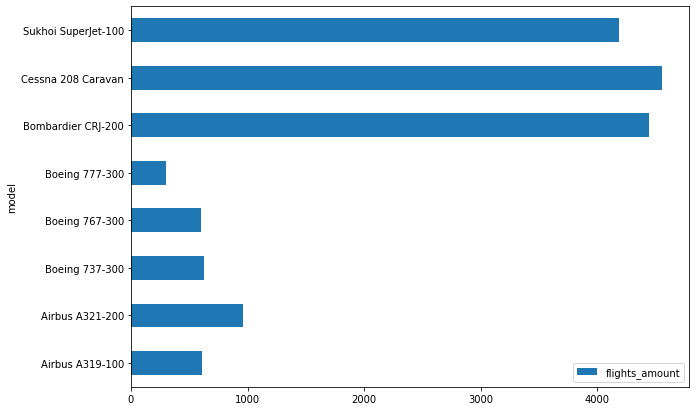

In [9]:
models.plot(x='model',kind='barh', figsize = (10,7))
plt.show()

Airbus и Boing значительно проигрывают другим маркам самолётов (Bombardier, Cessna, Sukhoi). 

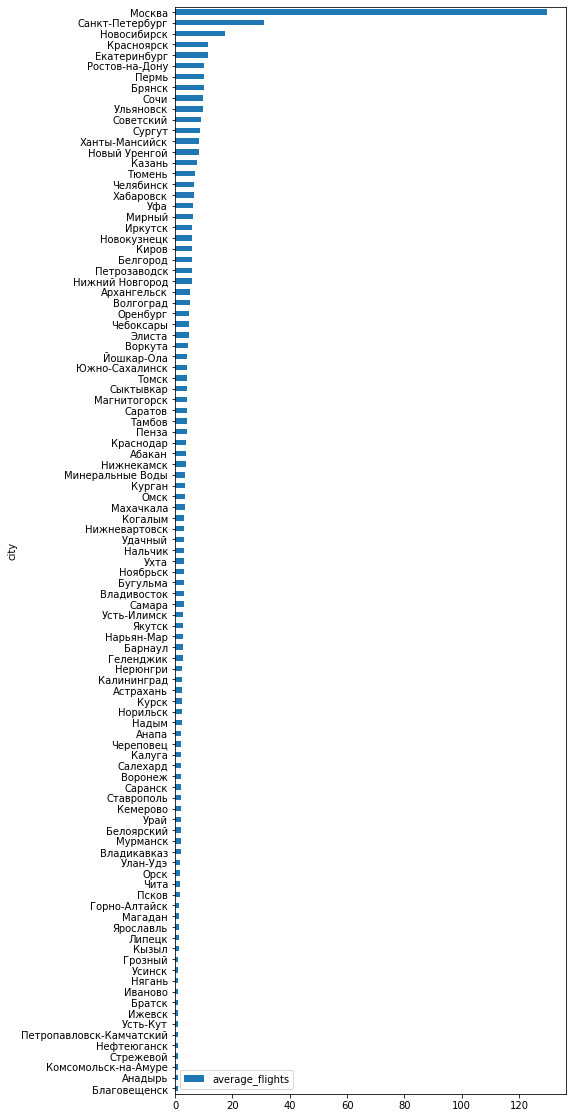

In [10]:
cities.sort_values('average_flights',).plot(x='city',kind='barh', figsize = (7,20))
plt.show()

Москва является абсолютным лидером по среднему количеству рейсов, прибывающих в город за день в августе 2018 года.

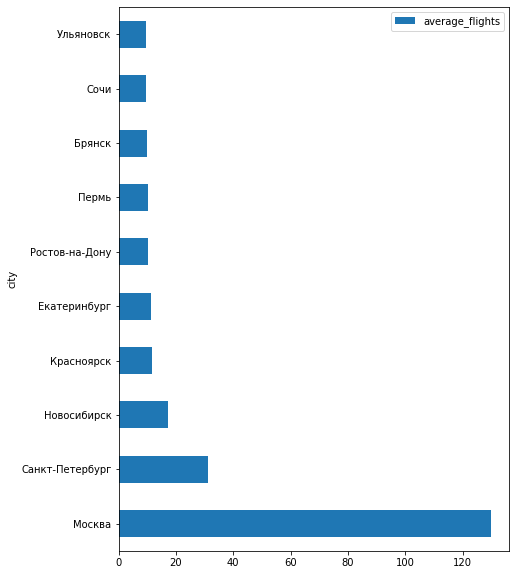

In [11]:
cities.sort_values('average_flights',ascending=False).head(10).plot(x='city',kind='barh', figsize = (7,10))
plt.show()

После Москвы идут Санкт-Петербург и Новосибирск - северная столица и столица сибири. В остальных городах (из топ 10) количество прибывших рейсов практически не различается.

<div class="alert alert-info">
Показатель количества рейсов в день связан с населением городов, где аэропорты находятся. Так, первая тройка в рейтинге аэропортов совпадает с первыми тремя городами России по численности населения. <br>
    <br>
Однако если Москва и Санкт-Петербург сильно отличаются от других городов по численности населения, то Новосибирск ненамного обгоняет своих ближайших преследователей, при этом заметно обгоняет их по числу рейсов. Это связано с тем, что Новосибирск является крупным транзитным узлом между Юго-Восточной Азией и Европой и принимает большое количество международных рейсов.<br>
    <br>
Удивляет попадание Брянска в ТОП10. Возможно это связано с тем, что он находится на пути Юго-Восточного направления рейсов из Москвы и получает часть транзитного трафика. <br>
    <br>
Попадание Сочи в десятку объяснимо его туристической популярностью. 
</div>

### Вывод

В ходе работы мы проверили гипотезу о том, что проведение крупных фестивалей в городах влияет на количество рейсов в эти города. Для этого мы сопоставили данные о количестве рейсов в обычные недели и данные о колчестве рейсов в недели фестивалей на примере Москвы. В результате мы отвергли гипотезу о том, что проведение фестивалей влияет на выбор рейсов, т.к. количество пребывающих самолетов оставалось примерно на одном уровне. 

При анализе статистики входящих рейсов по всем городам, у нас получилось выявить связь количества рейсов с численностью населения городов. Однако дополнительно мы выявили влияние на количество рейсов расположение городов на пути крупных транзитных авиа потоков. 

Также в ходе анализа нам удалось выявить, что ближнемагистральные марки самолетов совершают значительно большее рейсов, чем средне и крупномагистральные. 

